### Evaluating the m5 limits ###

Create "table 2" and "figure 4", from the overview paper.

This uses fiducial construction numbers for the seeing and skybrightness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import syseng_throughputs as st

In [2]:
pd.set_option('display.precision', 3)

In [3]:
# Read bandpass information.
defaultDirs = st.setDefaultDirs()
addLosses = True
# Use the X=1.0 atmosphere!
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:100: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:100: UserWarning: Wavelength sampling of 800.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


In [4]:
# Standard LSST visits, standard LSST readnoise and 1 visit = 15s x 2exp
m5_std = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2)
m5_std

,nexp,exptime,FWHMeff,FWHMgeom,skyMag,skyCounts,Zp_t,Tb,Sb,kAtm,gamma,Cm,dCm_infinity,dCm_double,m5,sourceCounts,m5_fid,m5_min
u,2.0,15.0,0.92,0.808,22.948,73.638,26.911,0.033,0.052,0.507,0.038,23.090,0.609,0.388,23.767,542.855,23.9,23.4
g,2.0,15.0,0.87,0.767,22.265,420.441,28.411,0.130,0.159,0.216,0.039,24.447,0.173,0.091,24.843,801.999,25.0,24.6
r,2.0,15.0,0.83,0.734,21.200,834.660,28.179,0.105,0.118,0.127,0.039,24.459,0.094,0.047,24.374,998.126,24.7,24.3
i,2.0,15.0,0.80,0.710,20.470,1250.952,27.919,0.083,0.091,0.096,0.039,24.376,0.065,0.031,23.966,1143.800,24.0,23.6
z,2.0,15.0,0.78,0.693,19.599,1916.456,27.538,0.058,0.062,0.069,0.039,24.223,0.043,0.020,23.405,1350.441,23.3,22.9
y,2.0,15.0,0.76,0.677,18.598,2368.700,26.667,0.026,0.031,0.169,0.039,23.746,0.035,0.016,22.456,1451.047,22.1,21.7


In [5]:
# Now also use X=1.2 atmosphere.
defaultDirs = st.setDefaultDirs()
addLosses = True
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)
# Calculate degraded seeing values (have to increase FWHM from default values)

# And calculate m5 for a standard visit. 
m5_X = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2, X=1.2)

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:100: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:100: UserWarning: Wavelength sampling of 800.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


In [6]:
# Add degradation of m5 when X=1.2 into m5_std columns (dCm_double for double visit time already there)
m5_std['m5_1.2'] = m5_X['m5']
m5_std['dM5_1.2'] = m5_std['m5'] - m5_X['m5']

In [7]:
cols = m5_std.columns
cols = ['skyMag', 'FWHMgeom', 'FWHMeff', 'gamma', 'kAtm', 'Cm', 'm5', 'dCm_infinity', 'dCm_double', 'dM5_1.2']
m5_std[cols].T

,u,g,r,i,z,y
skyMag,22.948,22.265,21.200,20.470,19.599,18.598
FWHMgeom,0.808,0.767,0.734,0.710,0.693,0.677
FWHMeff,0.920,0.870,0.830,0.800,0.780,0.760
gamma,0.038,0.039,0.039,0.039,0.039,0.039
kAtm,0.507,0.216,0.127,0.096,0.069,0.169
Cm,23.090,24.447,24.459,24.376,24.223,23.746
m5,23.767,24.843,24.374,23.966,23.405,22.456
dCm_infinity,0.609,0.173,0.094,0.065,0.043,0.035
dCm_double,0.388,0.091,0.047,0.031,0.020,0.016
dM5_1.2,0.216,0.160,0.142,0.133,0.130,0.140


In [8]:
print(m5_std[cols].T.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & u & g & r & i & z & y \\
\midrule
skyMag & 22.948308 & 22.264991 & 21.199715 & 20.470117 & 19.598539 & 18.597696 \\
FWHMgeom & 0.808240 & 0.767140 & 0.734260 & 0.709600 & 0.693160 & 0.676720 \\
FWHMeff & 0.920000 & 0.870000 & 0.830000 & 0.800000 & 0.780000 & 0.760000 \\
gamma & 0.038158 & 0.038753 & 0.038998 & 0.039126 & 0.039260 & 0.039311 \\
kAtm & 0.506813 & 0.215549 & 0.126720 & 0.095903 & 0.068894 & 0.169114 \\
Cm & 23.089967 & 24.446678 & 24.458747 & 24.376211 & 24.222775 & 23.745944 \\
m5 & 23.767396 & 24.843121 & 24.373655 & 23.966290 & 23.404553 & 22.455503 \\
dCm_infinity & 0.608769 & 0.172866 & 0.094418 & 0.064930 & 0.043343 & 0.035358 \\
dCm_double & 0.387713 & 0.091121 & 0.046826 & 0.031034 & 0.019885 & 0.015820 \\
dM5_1.2 & 0.215892 & 0.159705 & 0.142195 & 0.133158 & 0.129929 & 0.139981 \\
\bottomrule
\end{tabular}



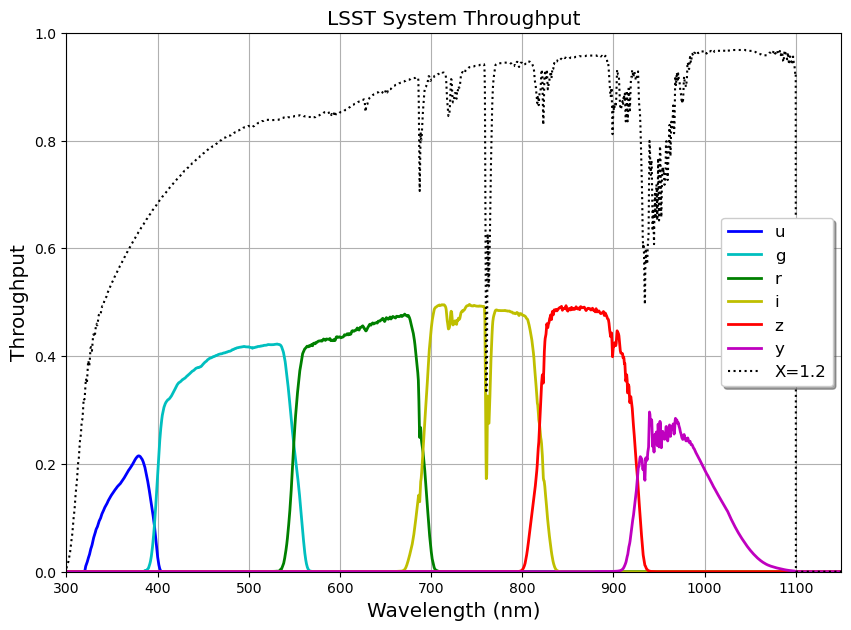

In [9]:
# Generate the plot for Figure 4, using X=1.2
plt.figure(figsize=(10, 7))
st.plotBandpasses(system, title='LSST System Throughput', addlegend=False, newfig=False)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'k:', label='X=1.2')
plt.ylabel("Throughput")
plt.legend(loc='right', numpoints=1, fancybox=True, shadow=True, fontsize='large')
#plt.savefig('Figure4.pdf', format='pdf')